
Import Libraries


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Set Up the Path and Hyperparameters

In [19]:
train = r"C:\Users\talal\Downloads\training_set\training_set"
validation = r"C:\Users\talal\Downloads\test_set\test_set"

# Hyperparameters
batch_size = 32
img_height = 150 
img_width = 150

Data preprocessing 

In [26]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = True
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    validation,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False
)


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


Data Augmentation

In [27]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),      
    tf.keras.layers.RandomRotation(0.1),         
    tf.keras.layers.RandomZoom(0.1)       
])

Model

In [31]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the Model

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [33]:
history = model.fit(train_data, validation_data= validation_data, epochs=10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 185s 724ms/step - accuracy: 0.5446 - loss: 0.7297 - val_accuracy: 0.6495 - val_loss: 0.6605
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 172s 685ms/step - accuracy: 0.6240 - loss: 0.6586 - val_accuracy: 0.6703 - val_loss: 0.6105
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 167s 663ms/step - accuracy: 0.6689 - loss: 0.6091 - val_accuracy: 0.7064 - val_loss: 0.5760
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 166s 662ms/step - accuracy: 0.7036 - loss: 0.5752 - val_accuracy: 0.7113 - val_loss: 0.5625
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 166s 661ms/step - accuracy: 0.7298 - loss: 0.5490 - val_accuracy: 0.7341 - val_loss: 0.5427
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 167s 666ms/step - accuracy: 0.7430 - loss: 0.5281 - val_accuracy: 0.7548 - val_loss: 0.5049
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 165s 655ms/step - accuracy: 0.7524 - loss: 0.5071 - val_accuracy: 0.7474 - val_loss: 0.5122
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 167s 664ms/step - accuracy: 0.7590 -

Evaluate Performance

Text(0.5, 1.0, 'Training and Validation Loss')

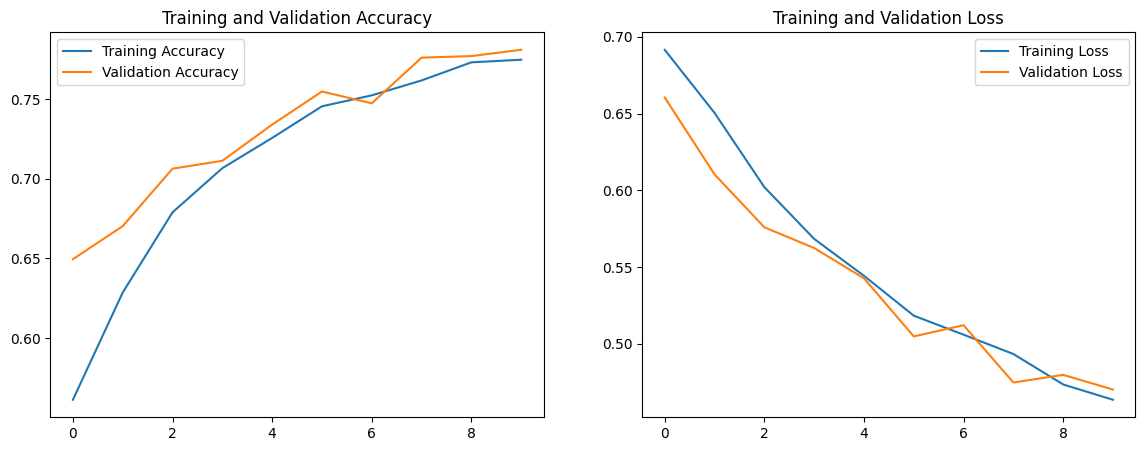

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(epochs)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label= 'Training Accuracy')
plt.plot(epoch_range, val_acc, label= 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label= 'Training Loss')
plt.plot(epoch_range, val_loss, label= 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [47]:
prediction = model.predict(validation_data)

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step
